In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

import pandas as pd
import cv2
import os
import random
import gc

pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
sports furniture animal accessory food outdoor electronic kitchen indoor vehicle person appliance


In [13]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
print(catIds)
imgIds = coco.getImgIds(catIds=catIds );
# print(imgIds)
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
annAll = coco.loadImgs(imgIds)

[1]


In [6]:
from shutil import copyfile
src = '/home/dawid/Desktop/images/'
dst = '/home/dawid/Desktop/human_images/'
annAll
for ann in annAll:
     copyfile(src+''+ann['file_name'], dst+''+ann['file_name'])


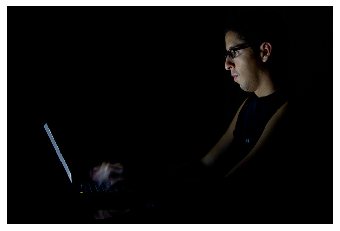

In [14]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

[{'segmentation': [[423.68, 56.2, 427.93, 82.52, 427.93, 100.35, 427.08, 126.66, 440.66, 130.91, 441.51, 136.85, 447.45, 138.55, 445.75, 148.73, 455.94, 152.98, 460.19, 163.17, 471.22, 169.96, 478.86, 171.65, 461.88, 190.33, 427.93, 247.21, 383.78, 295.59, 393.97, 312.57, 416.89, 325.31, 429.63, 343.13, 452.55, 386.43, 560.36, 262.49, 584.97, 177.6, 540.83, 157.22, 545.08, 89.31, 517.06, 29.89, 466.98, 12.06, 433.87, 32.43]], 'area': 38151.798200000005, 'iscrowd': 0, 'image_id': 477805, 'bbox': [383.78, 12.06, 201.19, 374.37], 'category_id': 1, 'id': 564585}, {'segmentation': [[220.71, 348.25, 225.15, 318.31, 218.49, 310.55, 204.07, 308.33, 189.65, 308.33, 173.02, 317.2, 163.04, 336.05, 174.13, 350.47, 191.87, 353.8]], 'area': 2193.6058500000013, 'iscrowd': 0, 'image_id': 477805, 'bbox': [163.04, 308.33, 62.11, 45.47], 'category_id': 1, 'id': 2165810}]


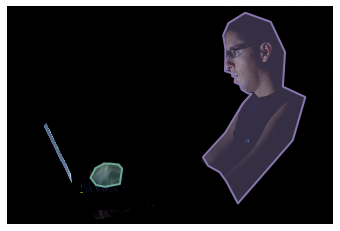

In [15]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
print(anns)

In [9]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.29s)
creating index...
index created!


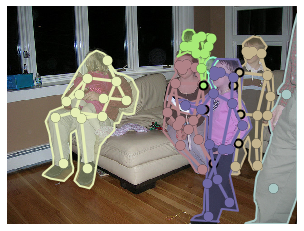

In [10]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [11]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A girl is playing a game system while other kids look on.
Group of children and adults playing a video game.
Several children watch while a girl in a pink sweatshirt plays with a Wii remote while another person with a little girl on their lap snuggle in a chair in the background.
A group of people are playing wii in the living room
The girl in a pink sweater is playing a video game.


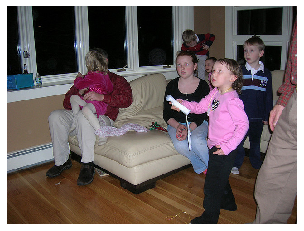

In [12]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()